In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import plotly.express as px
import requests
from bs4 import BeautifulSoup

## Scrapping the Dataset

In [2]:
url = "https://keras.io/api/applications/"

html = requests.get(url).text
soup = BeautifulSoup(html)

In [3]:
available_models = pd.DataFrame(columns=["Model", "Size (MB)", "Top-1 Accuracy", "Top-5 Accuracy",
                                         "Parameters", "Depth", "Time (ms) per inference step (CPU)",
                                         "Time (ms) per inference step (GPU)"])

In [4]:
for row in soup.h2.next_sibling.next_sibling.find_all("tr"):
    col = row.find_all(["td"])
    try:
        model = col[0].text.strip()
        size = col[1].text.strip()
        top1 = col[2].text.strip()
        top5 = col[3].text.strip()
        params = col[4].text.strip()
        depth = col[5].text.strip()
        cpu = col[6].text.strip()
        gpu = col[7].text.strip()

        #print(model, size, top1, top5, params, depth, cpu, gpu)
        available_models.loc[len(available_models.index)] = [model, size, top1, top5, params, depth, cpu, gpu]
    except:
        print("Null Value!! Ignored!!")

Null Value!! Ignored!!


## Load the Dataset

In [5]:
available_models.head()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,88,79.0%,94.5%,22.9M,81,109.4,8.1
1,VGG16,528,71.3%,90.1%,138.4M,16,69.5,4.2
2,VGG19,549,71.3%,90.0%,143.7M,19,84.8,4.4
3,ResNet50,98,74.9%,92.1%,25.6M,107,58.2,4.6
4,ResNet50V2,98,76.0%,93.0%,25.6M,103,45.6,4.4


In [7]:
### Saving the Dataset
available_models.to_csv("available_models.csv", index=True)

In [16]:
available_models = pd.read_csv("available_models.csv", index_col=0)
available_models.head()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,88.0,79.0%,94.5%,22.9M,81,109.4,8.1
1,VGG16,528.0,71.3%,90.1%,138.4M,16,69.5,4.2
2,VGG19,549.0,71.3%,90.0%,143.7M,19,84.8,4.4
3,ResNet50,98.0,74.9%,92.1%,25.6M,107,58.2,4.6
4,ResNet50V2,98.0,76.0%,93.0%,25.6M,103,45.6,4.4


In [18]:
# Change some columns from onjects to float, so we can visualize it
columnss = ['Size (MB)','Parameters', 'Depth','Top-1 Accuracy', 'Top-5 Accuracy',
            'Time (ms) per inference step (CPU)',
            'Time (ms) per inference step (GPU)']

for col in columnss:
    # Convert the column to string type before using .str accessor
    available_models[col] = available_models[col].astype(str)

    # Remove commas and any non-digit characters (except for decimal point)
    available_models[col] = available_models[col].str.replace(',', '').str.replace('[^\d.]', '', regex=True)

    # Convert to float
    available_models[col] = pd.to_numeric(available_models[col], errors='coerce')

available_models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               38 non-null     object 
 1   Size (MB)                           38 non-null     float64
 2   Top-1 Accuracy                      38 non-null     float64
 3   Top-5 Accuracy                      33 non-null     float64
 4   Parameters                          38 non-null     float64
 5   Depth                               26 non-null     float64
 6   Time (ms) per inference step (CPU)  26 non-null     float64
 7   Time (ms) per inference step (GPU)  26 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


In [23]:
available_models.head(3)

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,88.0,79.0,94.5,22.9,81.0,109.4,8.1
1,VGG16,528.0,71.3,90.1,138.4,16.0,69.5,4.2
2,VGG19,549.0,71.3,90.0,143.7,19.0,84.8,4.4


In [10]:
'''plt.figure(figsize=(15, 4))
sns.lineplot(x="Model", y="Size (MB)", data=available_models)
plt.xticks(rotation=90)
plt.show()'''

'plt.figure(figsize=(15, 4))\nsns.lineplot(x="Model", y="Size (MB)", data=available_models)\nplt.xticks(rotation=90)\nplt.show()'

## Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
available_models_copy = available_models.copy()
available_models_copy[columnss] = scaler.fit_transform(available_models[columnss])

available_models_copy.head()

,Model,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
0,Xception,0.057099,0.527607,0.6250,0.055972,0.125725,0.055773,0.080756
1,VGG16,0.396605,0.055215,0.0750,0.389209,0.000000,0.030136,0.013746
2,VGG19,0.412809,0.055215,0.0625,0.404501,0.005803,0.039967,0.017182
3,ResNet50,0.064815,0.276074,0.3250,0.063762,0.176015,0.022875,0.020619
4,ResNet50V2,0.064815,0.343558,0.4375,0.063762,0.168279,0.014779,0.017182


In [22]:
available_models_copy.describe()

,Size (MB),Top-1 Accuracy,Top-5 Accuracy,Parameters,Depth,Time (ms) per inference step (CPU),Time (ms) per inference step (GPU)
count,38.000000,38.000000,33.000000,38.000000,26.000000,26.000000,26.000000
mean,0.140582,0.551017,0.578409,0.136879,0.425978,0.119161,0.131113
std,0.194679,0.274730,0.277831,0.192942,0.271413,0.222183,0.225960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022762,0.371166,0.437500,0.020845,0.188104,0.023196,0.027062
50%,0.064815,0.555215,0.600000,0.063762,0.374275,0.041509,0.053265
75%,0.165895,0.760736,0.787500,0.160920,0.610251,0.068689,0.089777
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

Karna ada beberapa values yang NaN, maka kita bagi visualisasi jadi 2 bagian:
- visualisasi dengan membuang NaN, shg fokus pada column **Model, Size, Parameters, Depth, dan Time**.

- Visualisasi seluruh dataset, tapi hanya fokus pada columns **Model, Size dan Parameters**

In [25]:
#available_models_copy

In [ ]:
#available_models_copy.melt(id_vars=['Model']).Model.value_counts()

### Visualisasi ke-1

In [27]:
available_models_copy.columns.values

array(['Model', 'Size (MB)', 'Top-1 Accuracy', 'Top-5 Accuracy',
       'Parameters', 'Depth', 'Time (ms) per inference step (CPU)',
       'Time (ms) per inference step (GPU)'], dtype=object)

In [45]:
len(melted_df1.Model.unique())

38

In [47]:
#sample_for_visualize1 = available_models_copy.drop(columns=["Top-1 Accuracy", "Top-5 Accuracy"]).dropna()

# Melt the DataFrame to long format for easier plotting with seaborn
melted_df1 = available_models_copy.melt(id_vars=['Model'], value_vars=available_models_copy.columns.values,
                                        var_name='Metric', value_name='Value')

# Create the line plot
plt.figure(figsize=(15, 7))  # Adjust figure size as needed
fig = px.line(melted_df1, x='Model', y='Value', color='Metric',
              title='Comparison of Normalized Model Metrics')

# Draw line for mean values

fig.add_shape(type='line', x0=0, x1=len(melted_df1.Model.unique()),
              y0=0, y1=0, line=dict(color='black'))

fig.update_layout(
    xaxis_tickangle=90,  # Rotate x-axis labels for better readability
    yaxis_title='Normalized Value')

fig.show()


<Figure size 1500x700 with 0 Axes>

### Visualisasi ke-2

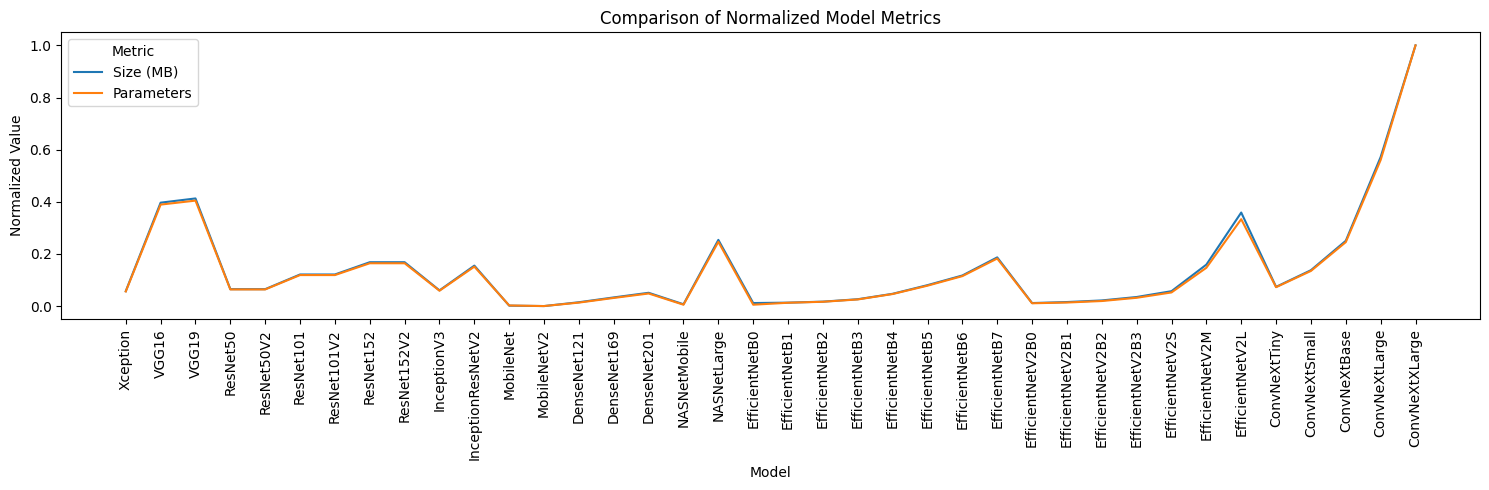

In [ ]:
sample_for_visualize2 = available_models_copy[["Model","Size (MB)","Parameters"]]

# Melt the DataFrame to long format for easier plotting with seaborn
melted_df2 = sample_for_visualize2.melt(id_vars=['Model'], value_vars=sample_for_visualize2.columns.values,
                                        var_name='Metric', value_name='Value')

# Create the line plot
plt.figure(figsize=(15, 5))  # Adjust figure size as needed
sns.lineplot(x='Model', y='Value', hue='Metric', data=melted_df2)


plt.xticks(rotation=90)
plt.title('Comparison of Normalized Model Metrics')  # Add a title
plt.ylabel('Normalized Value')  # Add y-axis label
plt.tight_layout()  # Adjust layout for better spacing
plt.show()